# K-Means Clustering Algorithm

This time i'm going to try one of many unsupervised learning algorithm which is k-means clustering. This algorithm mainly used for identifying clusters in data or classifying new data based on the existing cluster. The heart of this algorithm is pretty simple. It boils down to four main steps

1. Initialize random centroids for k-number of desired cluster
2. Calculate euclidean distance for each cluster to all the data points
3. Choose where one data point belongs to which centroid based on its closest euclidean distance to a centroid
4. "Move" centroids to new position based on the mean of the clustered sample
5. Repeat until desired iteration or desirable cluster forms

## 00. Make sample data 

In this notebook i will use make_blobs from scikit-learn to create clustered sample data 


In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np


In [2]:
# you can always use help to understand particular methods or api
# help(make_blobs)

x, y = make_blobs(n_samples=10, n_features=2, centers=3, cluster_std=1)

# lets inspect our data
print('shape of the data: ', x.shape)
print('shape of the label: ', y.shape)

shape of the data:  (10, 2)
shape of the label:  (10,)


The `make_blobs` function receives arguments such as `n_samples` which determines how many samples/records/observation in our simulated data, `n_features` which determines number of features or dimension of our data, `centers` determines how many cluster our sample data will have, and its standard deviation or spread in `cluster_std`. 

For simplicity we will start with 2 dimensional data with 3 clusters and standard deviation of 1

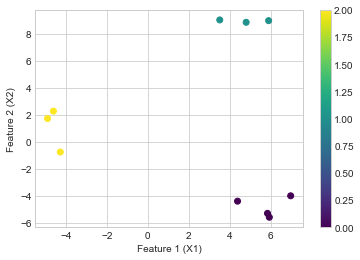

In [3]:
%matplotlib inline

# visualize our data
plt.style.use('seaborn-whitegrid')

plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (X1)')
plt.ylabel('Feature 2 (X2)')
plt.colorbar()
plt.show()

Since the objective of our kmeans clustering algorithm is to find out whether there are clusters in our data or we just want to make a cluster of a somewhat unclustered data. We will not use the label from the `make_blobs` function, we only interested in the raw unlabeled data. Thus, this algorithm falls in the category of **unsupervised learning**.

Here is what our algorithm will see what our data looks like, plain unlabeled data.

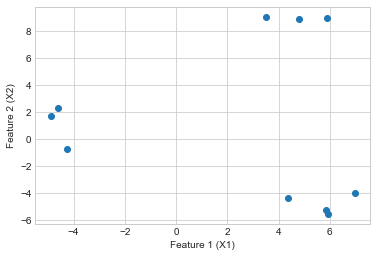

In [4]:
plt.scatter(x[:,0], x[:,1])
plt.xlabel('Feature 1 (X1)')
plt.ylabel('Feature 2 (X2)')
plt.show()

## 01. Initialize random centroids

In this step we will determine how many cluster that we want to cluster our data to, i will refer to the number of the centroid as $k$. A centroid is the center of a data cluster, so if our data happen to look like that they have 3 clusters, we will initialize 3 centroids. Or we can totally arbitrarily choose $k$ if we want the data to be clustered to 4 or more cluster whether our data shows any visible clustering or not.

In [5]:
#write a function to initialize coordinate of our k-th centroids in our feature space
def randomize_centroids(k=2, *args):
    '''
    k = number of centroid(s)
    args = data for each feature, we need this to capture the range of each feature, 
           to keep the the random coordinate inside our data range
           
    example
    
    >>> centroid = randomize_centroids(2, x1, x2, x3) # where x1, x2, x3 are 1-D array with i(n of obs.)x 1 size
    >>> centroid
    
    # first index denote the k-th centroid and second index denote the random number in range of n-th feature
    
    [[rand11, rand12, rand13],
     [rand31, rand32, rand33],
     [rand31, rand32, rand33]]
    '''
    centroids = []
    for _ in range(k):
        centroid = [random.uniform(min(arg), max(arg)) for arg in args]
        centroids.append(centroid)
    return np.array(centroids)



# since we have 3 cluster, let's try for k=3
centroids = randomize_centroids(3, x[:,0], x[:,1])
centroids

array([[-1.93273334,  1.55048901],
       [-4.13670402, -4.63213108],
       [ 1.52989722, -2.65340047]])

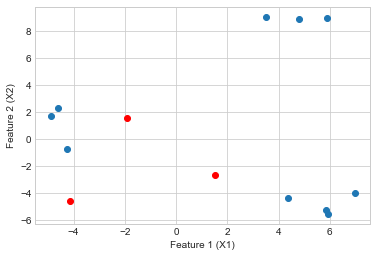

In [6]:
# let's visualize our centroids

plt.scatter(x[:,0], x[:,1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')
plt.xlabel('Feature 1 (X1)')
plt.ylabel('Feature 2 (X2)')
plt.show()

## 02. Calculate euclidean distance 

Euclidean distance or as we know square root distance refers to a distance from one point to another point in our feature space. In this step we will calculate euclidean distance from one centroid to all the data point, then we will move to another centroid and do the same exact thing, until we have a distance for each k-th centroids and each data points.

In [7]:
# first we make a function to calculate euclidean distance
def euclidean_distance(x1, x2):
    '''
    calculate euclidean distance of any dimension from 2 or more data points
    '''
    return np.sqrt(np.sum((x1-x2)**2))
      
                   
#Then we loop for k centroids to calculate the distance from the k-th random coordinate to each point in our data

distance = []                   
for k in range(centroids.shape[0]):
    dist = [euclidean_distance(centroids[k,:], x[i,:]) for i in range(x.shape[0])]
    distance.append(dist) 
                   
distance # k x i lists 

[[2.780017149074779,
  9.269634253182156,
  10.491018978982767,
  8.669953616048229,
  10.806462686305403,
  10.618443080331796,
  9.94964574589442,
  2.9728978438973486,
  10.360985847845608,
  3.285713518100965],
 [6.9341184753618625,
  15.677783147296674,
  11.124712149972016,
  8.515158094246463,
  16.9263214260374,
  10.108482051123065,
  16.197845440469646,
  6.414092999382548,
  9.997258720007597,
  3.8833133137260605],
 [7.8827924388680986,
  11.87493223321127,
  5.6041820297617635,
  3.337292689682221,
  12.445548483537358,
  5.286973649629222,
  11.987086163699537,
  7.785342440116884,
  5.057516787808047,
  6.110827699757289]]

## 03. Updating the centroids

To update the position of the centroids we will use the mean of the closest data to our centroid

In [8]:
# i will transform the distance list to i x k shape numpy array
distance = np.array(distance).T

# choose which centroids is the closest by looking at i-th records and return the index k for the closest distance
center = np.array([np.argmin(distance[i,:]) for i in range(distance.shape[0])])
print(distance[0,:])
print(center)

[2.78001715 6.93411848 7.88279244]
[0 0 2 2 0 2 0 0 2 0]


We can see that no data belongs to the 1st centroid, this can cause problems since we will need the mean coordinate of data points that belong to k-th centroid to update its position. A way to overcome this problem is to discard the 1st centroid, but if we want to cluster our data to 3 cluster rather than 2 this is not a really good choice, moreover if we were able observe an obvious k number of clusters in our data, we will still want the data to be clustered to k number of cluster.

So to overcome this problem i will initialize new random position to the corresponding centroid that does not have "followers" to update its position.

In [9]:
# our data that belongs to the 0-th centroid 
x[center==0, :]

array([[-4.61381048,  2.28555411],
       [ 3.507709  ,  9.05566765],
       [ 5.89382054,  9.00197813],
       [ 4.79553305,  8.88028313],
       [-4.89981216,  1.73640525],
       [-4.27738121, -0.7513667 ]])

In [10]:
# we will make new array for updated centroids as a comparison to the initial centroid
centroids_new = np.zeros(centroids.shape)

for i in range(centroids.shape[0]):
    #retrieve all data in all feature that belong to the k-th centroid
    new = x[center==i, :]

    # if we do not have shortest distance for one centroid
    if len(new) == 0:
        centroids_new[i, :] = randomize_centroids(1, x[:,0], x[:,1])
    else:
        centroids_new[i, :] = new.mean(axis=0) # mean of the closest point coordinate will be the new position of k-th centroid
        
print(centroids_new)
print(centroids)

[[ 0.06767646  5.03475359]
 [-4.61226783  0.82388948]
 [ 5.77739028 -4.82240398]]
[[-1.93273334  1.55048901]
 [-4.13670402 -4.63213108]
 [ 1.52989722 -2.65340047]]


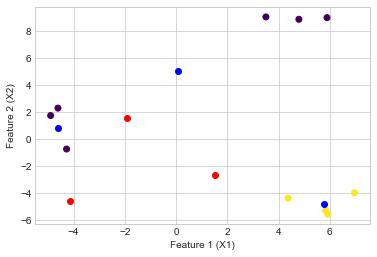

In [11]:
plt.scatter(x[:,0], x[:,1], c=center, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', label='Initial Centroids')
plt.scatter(centroids_new[:, 0], centroids_new[:, 1], c='b', label='Updated Centroids')
plt.xlabel('Feature 1 (X1)')
plt.ylabel('Feature 2 (X2)')
# plt.legend()
plt.show()

Well, plot above shows the result for one iteration, i'll write functions for each step to simplify things up, then we can work with numbers of iteration

In [12]:
def randomize_centroids(k=2, *args):
    '''
    k = number of centroid(s)
    args = data for each feature
    '''
    centroids = []
    for _ in range(k):
        centroid = [random.uniform(min(arg), max(arg)) for arg in args]
        centroids.append(centroid)
    return np.array(centroids)


def euclidean_distance(x1, x2):
    '''
    calculate euclidean distance of any dimension from 2 or more data points
    '''
    return np.sqrt(np.sum((x1-x2)**2))


def choose_centroids(centroids,x):
    '''
    centroids is a numpy array containing centroids coordinates with a size of k(number of centroids) x n_features
    
    input data example :
    
    centroids = np.array([[x11, x12, x13], [x21, x22, x23], [x31, x32, x33]])
   
    # first index refers to k-th centroid, second index refers to the position of the centroid
    in n-th feature space
    
    
    x is a numpy array containing the dataset with i(number of observations) x n_features
    
    returns a numpy array with classes in which the data points is closest to k-th centroid
    '''
    distance = []
    # loop for each centroid and calculate its euclidean distance to each sample for each feature in the dataset
    for k in range(centroids.shape[0]):
        dist = [euclidean_distance(centroids[k,:], x[i,:]) for i in range(x.shape[0])]
        distance.append(dist) # k x i lists since we are looping for the k-th centroid
    
    # transform to i x k size
    distance = np.array(distance).T
    
    # choose which centroids is the closest
    center = [np.argmin(distance[i,:]) for i in range(distance.shape[0])]
    return np.array(center)

def update_centroids(initial_centroid, center, x):
    '''
    center is an output array from choose_centroids function
    
    '''
    for i in range(initial_centroid.shape[0]):
        new = x[center==i, :]
    
        # if we do not have shortest distance for one centroid
        if len(new) == 0:
            initial_centroid[i, :] = randomize_centroids(1, x[:,0], x[:,1])
        else:
            initial_centroid[i, :] = new.mean(axis=0)

Okay let's try for 20 iteration

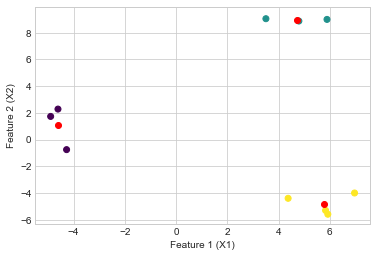

In [13]:
# initialize random centroids with k = 3
centroids = randomize_centroids(3, x[:,0], x[:,1])

for i in range(20):
    # calculate each data points distance to each centroids
    center = choose_centroids(centroids, x)

    #Update centroids
    update_centroids(centroids, center, x)

plt.scatter(x[:,0], x[:,1], c=center, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')
plt.xlabel('Feature 1 (X1)')
plt.ylabel('Feature 2 (X2)')
plt.show()

We can see that our centroids finally found their "neighbors" correctly, let's try our algorithm for more data samples and dimensions

# Higher dimensional dataset

Let's test our clustering algorithm to cluster 3 dimensional dataset with more challenging data spread

In [14]:
x, y = make_blobs(n_samples=1000, n_features=3, centers=3, cluster_std=3)

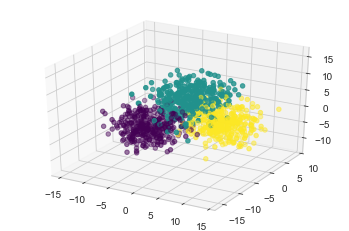

In [15]:
# uncomment line below if you want to use interactive matplotlib window if you're in jupyter notebook
# %matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=y, cmap='viridis')

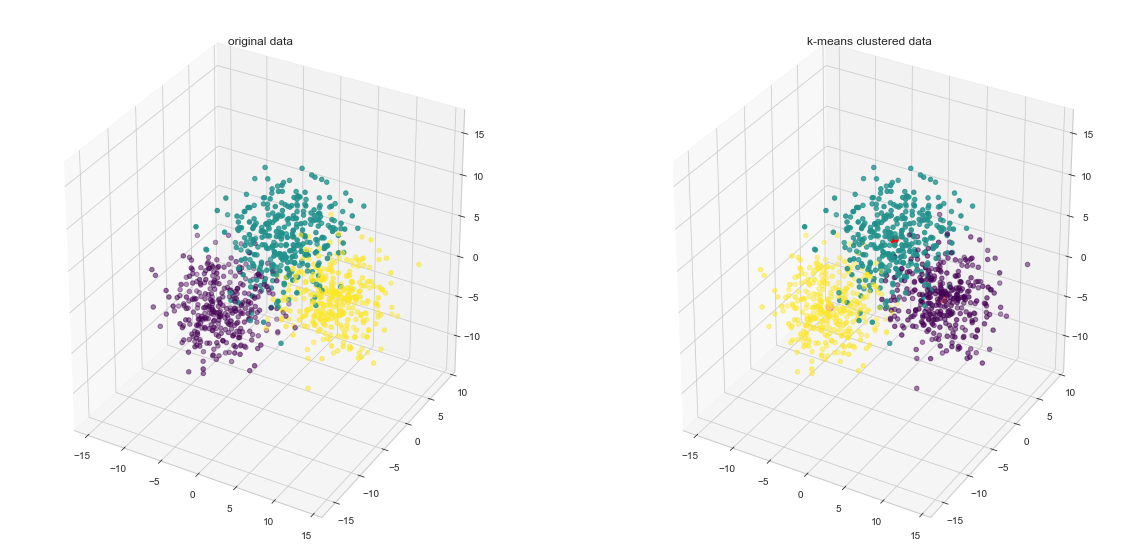

In [16]:
# initialize random centroids with k = 3
c = randomize_centroids(3, x[:,0], x[:,1], x[:,2])

for i in range(50):
    # calculate each data points distance to each centroids
    center = choose_centroids(c, x)

    #Update centroids
    update_centroids(c, center, x)

#visualize
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x[:,0], x[:,1], x[:,2], c=y, cmap='viridis')
ax1.set_title('original data')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x[:,0], x[:,1], x[:,2], c=center, cmap='viridis')
ax2.scatter(c[:,0], c[:,1], c[:,2], c='r', s=60)
ax2.set_title('k-means clustered data')
# ax1.scatter(c[:,0], c[:,1], c[:,2], c='r')
plt.show()

It looks like our algorithm works fine for higher dimensional dataset, and you can experiment with different number of centroids, dimension, iteration and data spread to see how the algorithm will behave. So the key take away from this algorithm is this algorithm is useful when we do not have labels in our dataset, and we want to create segments or clusters out of our data. This supervised learning algorithm can be useful when paired with PCA when we have large dimensional data, and the output of this clustering algorithm might be useful for further supervised learning algorithm.

Reference(s) :
* Andrew Ng's Machine Learning course